# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

In [5]:
# insert code here
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to determine the number of components to use
pca = PCA()
pca.fit(X_scaled)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of components to explain 95% of variance: {num_components}')

# Transform the data to the reduced dimensionality
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

Number of components to explain 95% of variance: 13


> Describe your results here

Above analysis shows the cumulative percentage of the total variation in the data that is explained by each component. This number can be used to estimate the number of components needed to explain a particular amount of variance.

We can see that in this case, 13 components are required to explain 95% of the data variation. After 13 components, the marginal gain in explained variance starts to decline, indicating that more components are unlikely to add much new information. The most important patterns should therefore be preserved while the feature space is reduced by splitting the data into 13 components.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

Target Mean: 0.7573333333333333
Target Median: 1.0
Target Standard Deviation: 0.831208052639888
Target Minimum: 0.0
Target Maximum: 2.0


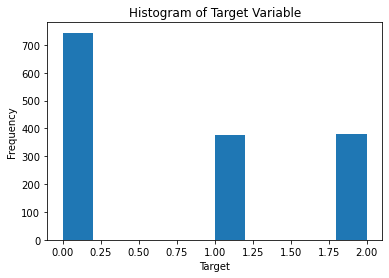

In [6]:
# Insert code here
import matplotlib.pyplot as plt

# Calculation of basic statistics
target_mean = df['target'].mean()
target_median = df['target'].median()
target_std = df['target'].std()
target_min = df['target'].min()
target_max = df['target'].max()

# Print of basic statistics
print("Target Mean:", target_mean)
print("Target Median:", target_median)
print("Target Standard Deviation:", target_std)
print("Target Minimum:", target_min)
print("Target Maximum:", target_max)

# Plot of a histogram of the target variable
plt.hist(df['target'])
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.show()


> Describe your results here

I prefer using accuracy as a baseline metric since the dataset might be balanced. If the dataset is imbalanced, we might want to use precision, recall, or F1-score instead.

Accuracy: It measures the proportion of correctly classified instances over the total number of instances. This metric is useful when we have a balanced dataset and all classes are equally important.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [7]:
# Insert code here
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.7033333333333334
Precision: 0.7033333333333334
Recall: 0.7033333333333334


In [19]:
y_pred_train = pipe.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train,average='micro')
recall = recall_score(y_train, y_pred_train,average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


> Describe results here
    
    I prefer using Logistic regression.The performance of the logistic regression model can be evaluated using metrics such as accuracy, precision, and recall.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [8]:
# Insert code
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('pca', PCA(n_components=2)),
    ('lr', LogisticRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=2)), ('lr', LogisticRegression())])

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pca__n_components': [2, 4, 6],
    'lr__C': [0.01, 0.1, 1.0, 10.0]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'lr__C': 0.01, 'pca__n_components': 6}
Best score: 0.7158333333333333


In [10]:
#accuracy calculation for test data
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = grid.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.70
Precision: 0.69
Recall: 0.70


In [ ]:
#accuracy calculation for training data
y_pred_train = pipe.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train,average='micro')
recall = recall_score(y_train, y_pred_train,average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

> Describe your results here


 To determine if the pipeline model performs better than the original logistic regression model, we can compare the accuracy, precision, and recall scores of the two models on the same test data. Here, the pipeline model has little lower scores than the original logistic regression model. Though, the performance of original logistic regression model and pipeline model is almost same,the performance of original logistic regression model is better.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [14]:
# Insert code here

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Instantiate the model
dt = DecisionTreeClassifier(random_state=123)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)


Accuracy:  0.66
Precision:  0.6798572683355292
Recall:  0.66


> Describe your results here

No, the decision tree model does not perform better than either of the logistic regression models.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [17]:
# Insert code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Create a pipeline with PCA and a decision tree classifier
pipe = Pipeline([
    ('pca', PCA(n_components=5)),
    ('dt', DecisionTreeClassifier(random_state=123))
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Generate classification report for the training data
from sklearn.metrics import classification_report

y_pred_train = pipe.predict(X_train)
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       591
         1.0       1.00      1.00      1.00       302
         2.0       1.00      1.00      1.00       307

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [18]:
# Insert code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Create a pipeline with PCA and a decision tree classifier
pipe = Pipeline([
    ('pca', PCA(n_components=5)),
    ('dt', DecisionTreeClassifier(random_state=123))
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Generate classification report for the training data
from sklearn.metrics import classification_report

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.73      0.70      0.71       153
         1.0       0.56      0.65      0.60        74
         2.0       0.61      0.56      0.59        73

    accuracy                           0.65       300
   macro avg       0.63      0.64      0.63       300
weighted avg       0.66      0.65      0.65       300



> Describe results here

    No, the decision tree model using PCA does not perform better than either of the logistic regression models.